# Practical Exam - Coffee Shops

## Instructions
- Use Python or R to perform the tasks required.
- Write your solutions in the workspace provided from your certification page.
- Include all of the visualizations you create to complete the tasks.
- Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.
- You do not need to include code unless the question says you must.
- You must pass all criteria to pass this exam. The full criteria can be found here: https://app.datacamp.com/certification/resource-center/practical-hub#data-scientist-associate

## Background

Java June is a company that owns coffee shops in a number of locations in Europe.

The company knows that stores with more reviews typically get more new customers. This is because new customers consider the number of reviews when picking between two shops.
They want to get more insight into what leads to more reviews.
They are also interested in whether there is a link between the number of reviews and rating.
They want a report to answer these questions.

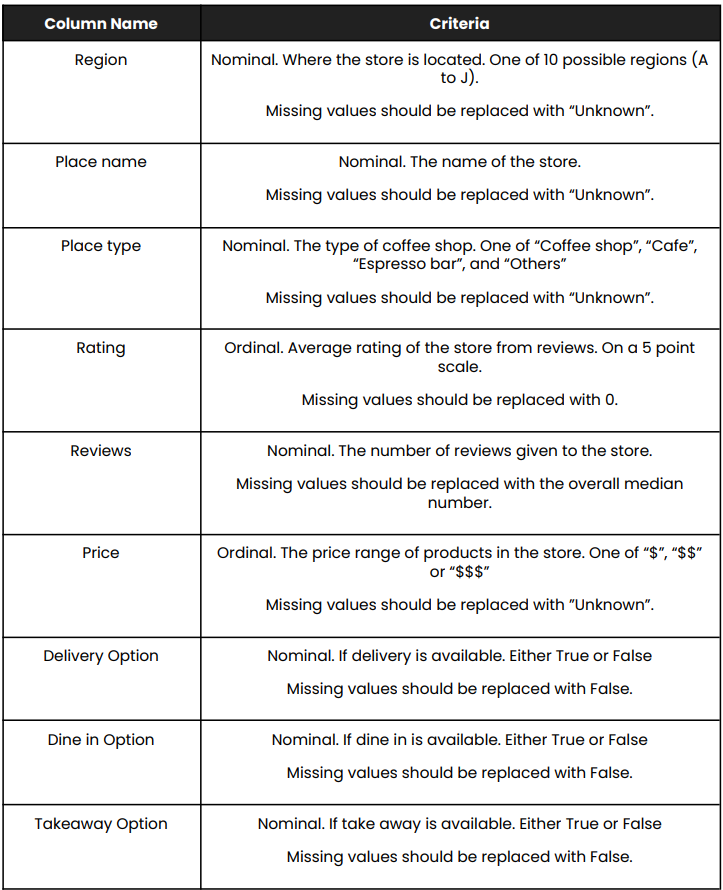

## Tasks

Submit your answers directly in the workspace provided.

1. For every column in the data:

    a. State whether the values match the description given in the table above.

    b. State the number of missing values in the column

    c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many stores were given each rating. Use the visualization to:

    a. State which category of the variable rating has the most number of observations

    b. Explain whether the observations are balanced across categories

3. Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution.

4. Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).

6. Fit a baseline model to predict the number of reviews a store will get using the data provided. You must include your code.

7. Fit a comparison model to predict the number of reviews a store will get using the data provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

10. Explain which model performs better and why.

## Tasks 1

1. For every column in the data:

    a. State whether the values match the description given in the table above.

    b. State the number of missing values in the column

    c. Describe what you did to make values match the description if they did not match.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/coffee.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


In [104]:
print(df['Region'].value_counts(dropna=False).sort_index())
# Matches the description in the table

df['Region'].isna().sum()
# No missing values

A    20
B    20
C    20
D    20
E    20
F    20
G    20
H    20
I    20
J    20
Name: Region, dtype: int64


0

In [105]:
df['Place name'].isna().sum()
# No NaN values
# No need to do anything

0

In [106]:
df['Place type'].isna().sum()
df['Place type'].value_counts()
# Fits the description
# No missing values

Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: Place type, dtype: int64

In [107]:
df['Rating'].isna().sum()
# There are 2 missing values

# Replacing NaNs with 0
df['Rating'] = df['Rating'].replace(np.NaN, 0)
df['Rating'].isna().sum()

0

In [108]:
df['Reviews'].isna().sum()
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())
df['Reviews'].isna().sum()

# There were 2 missing values. I replaced them with median Reviews score 

0

In [109]:
df['Price'].isna().sum()
# No missing values

df['Price'].value_counts()
# Matches the description

$$     194
$$$      4
$        2
Name: Price, dtype: int64

In [110]:
df['Delivery option'].isna().sum()
# No missing values

df['Delivery option'].value_counts()
# Matches the description

False    165
True      35
Name: Delivery option, dtype: int64

In [111]:
df['Dine in option'].isna().sum()
# 60 missing values

df['Dine in option'] = df['Dine in option'].fillna((False))
df.info() # Found 60 missing values and replaced them with bool type False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   144 non-null    object 
dtypes: bool(2), float64(2), object(5)
memory usage: 11.5+ KB


In [112]:
df['Takeout option'].isna().sum()
df['Takeout option'] = df['Takeout option'].fillna(False)
df.info() # Found 56 missing values and replaced them with bool type False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


## Task 2

2. Create a visualization that shows how many stores were given each rating. Use the visualization to:

    a. State which category of the variable rating has the most number of observations

    b. Explain whether the observations are balanced across categories

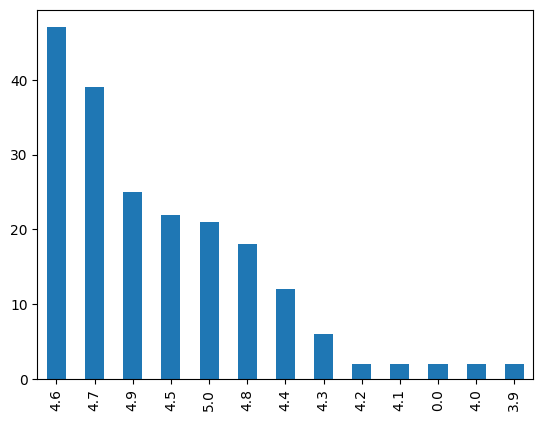

In [113]:
%matplotlib widget
%matplotlib inline
df['Rating'].value_counts().plot(kind='bar')
plt.show()

2.a Stores are mostly rated with Rating 4.6. 

2.b The observations are not balanced across the categories of Rating for values below 4.3. Most sores have rating accumulated around values 4.3 to 5 with peak at 4.6.

## Task 3

3. Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution.

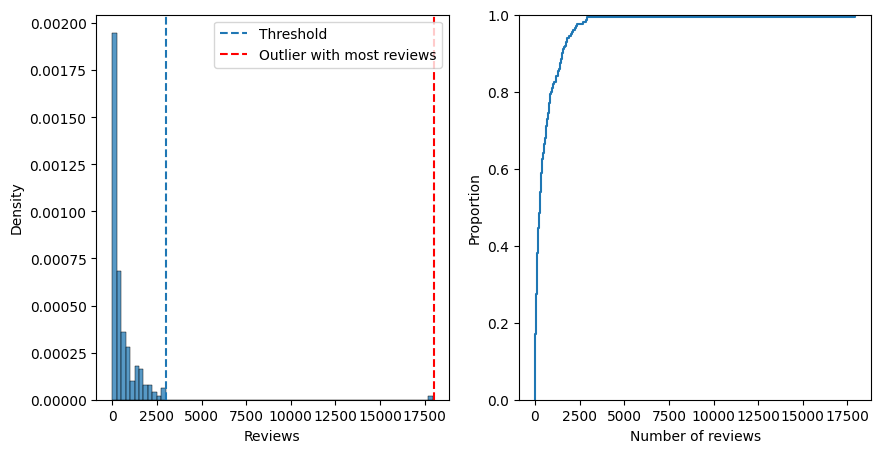

In [134]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharey=False, sharex=True, figsize=(10,5))
sns.histplot(df['Reviews'], stat='density', ax=ax0)
sns.ecdfplot(df['Reviews'], ax=ax1)

ax1.set(xlabel='Number of reviews')
ax0.axvline(x=3000, label='Threshold', linestyle='--')
ax0.axvline(x=18000, label='Outlier with most reviews', linestyle='--', color='red')
ax0.legend()

In [141]:
outlier = df[df['Reviews'] == df['Reviews'].max()]
outlier

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
100,E,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True


- Most stores accumulated around 500 reviews. 
- Almost all stores have less than 3000 reviews. More than 95% of values are accumulated for this threshold number of reviews (graph on the righ). 
- There most notable outlier shown on the left graph in red has 17937 reviews and is 'Lviv Coffee MAnufacture'.


## Task 4

4. Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.

In [153]:
# Removing the two outliers
df1 = df.query('Rating > 0 and Reviews < 5000')

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

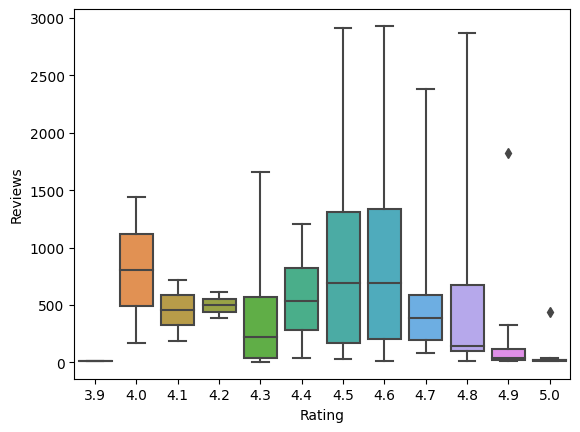

In [152]:
sns.boxplot(y='Reviews', x='Rating', data=df1, whis=10)

- Stores that have extremally low or extremally high overall Rating do not tend to have a lot of reviews
- However, there are some stores that have very high rating with rather high number of reviews. These are shown as outliers in the boxplot (diamond points).
- Rating of 4.5 to 4.6 is predominant and stores with that rating have usually the highest number of reviews
- There more extreme the rating usually the less variation in the number of reviews per store.

## Task 5

5. The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).


### This is a regression problem

## Task 6

6. Fit a baseline model to predict the number of reviews a store will get using the data provided. You must include your code.

In [ ]:
#  We will use df1 because I already removed the outliers here

## Task 7

7. Fit a comparison model to predict the number of reviews a store will get using the data provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

10. Explain which model performs better and why.